In [688]:
'''
    Housing Price Predition using Linear Regression(Coursera - assignment 1)
    Python Implementation.
'''

import pandas as pd
import numpy as np
from scipy.interpolate import make_interp_spline

In [689]:
'''
    Cost Function
    
    This function computes the cost using the squared error function for linear regression.
'''
def computeCost(X,y,theta,m):
    tempMatrix = np.dot(X,theta)
    price = np.array(y);
    
    j = (1 / (2*m)) * sum(np.square(np.subtract(tempMatrix,price)));
    
    return j;

In [690]:
'''
    Gradient Descent
    
    This runs the gradient descent algorithm to compute the value of the parameter vector theta
'''
def gradientDescent(X,y,theta,alpha,num_itr):
    m = len(X);
    
    j_history = np.zeros(num_itr);
    price = np.array(y);
    
    for i in range(num_itr):
        theta = np.subtract(theta,((alpha / m) * (X.T)@(X@theta - price)));
        j_history[i] = computeCost(X,y,theta,m);
    
    return theta, j_history;
    

In [746]:
'''
    Feature Normalisation
    
    This function adds the first column of all ones to the training set and normalises the features.
'''
def normaliseTrainingData(X, mean_matrix, std_matrix):
    normalisedTrainingSet = np.c_[np.ones(len(X)), (np.array((X - mean_matrix).T / std_matrix)).T];
                                      
    return normalisedTrainingSet;

In [747]:
'''
    Normal Equation
        
    This method computes the value of theta without gradient descent.
'''

def getThetaFromNormalEquation(X,y,theta):
    theta_ne = np.array(np.linalg.inv(X.T@X)@(X.T)@y);
    return theta_ne;

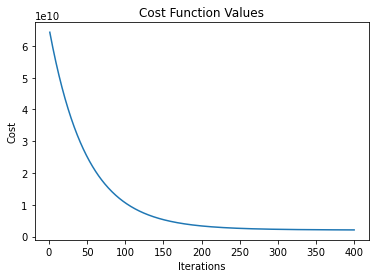

Parameter Vector - theta using Gradient Descent:
 [[334302.06399328]
 [100087.11600585]
 [  3673.54845093]]

Parameter Vector - theta using Normal Equations:
 [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]


In [748]:
'''Loading the data set'''

filename = 'ex1data2.txt'
data = pd.read_csv(
                   filename,
                   sep=',',
                   comment='#',
                   na_values=['Nothing'],
                   names=['Size', 'Rooms', 'Price']
                  );

# Building the training set and predicted output vector
training_set = data[['Size', 'Rooms']];
prices = data[['Price']];

# Initialisation of other variables 
alpha = 0.01; #learning rate
num_iters = 400; #number of iterations for gradient descent

theta = np.zeros((training_set.shape[1]+1), dtype=float).reshape(-1,1);

# returns a touple with normalised training data, mean and standard deviation of the features.
mu = np.array(training_set.mean());
sigma = np.array((training_set.T).std(1)).reshape(-1,1);
normalisedTrainingSet = normaliseTrainingData(training_set, mu, sigma);

theta_gradient_descent, j_history = gradientDescent(normalisedTrainingSet,prices,theta,alpha,num_iters);

# plotting cost function's values to observe gradient descent
 
x_axis = np.array([i+1 for i in range(len(j_history))]);
X_Y_Spline = make_interp_spline(x_axis, j_history)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x_axis.min(), x_axis.max(), 500)
Y_ = X_Y_Spline(X_)

plt.plot(X_, Y_)
plt.title("Cost Function Values")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

# theta from normal equation method
theta_normal_equations = getThetaFromNormalEquation(np.c_[np.ones(len(training_set)), 
                                                          np.array(training_set)], prices, theta);

print('Parameter Vector - theta using Gradient Descent:\n', theta_gradient_descent);

print('\nParameter Vector - theta using Normal Equations:\n', theta_normal_equations);


In [780]:
'''
    Comparison Block for parameter vector computed through Gradient Descent and Normal Equations Method.
    
    Input: Size and Number of bedrooms of the house - [1650, 3]
    Output: Predicted Price using the 2 methods.
'''
# predicted price from gradient descent
input_data = np.array([1650, 3]).reshape(-1,1);
mu = mu.reshape(-1,1);

# we are normalising the input data because the vector - theta is computed over normalised data.
normalised_inputData_gd = np.concatenate((np.ones(1).reshape(-1,1), ((input_data - mu) / sigma)));

print('Predicted price by Gradient Descent parameter vector is: ', normalised_inputData_gd.T@theta_gradient_descent);

# predicted price from Normal Equation
normalised_inputData_ne = np.concatenate((np.ones(1).reshape(-1,1),input_data));
print('Predicted price by Normal Equation parameter vector is: ', normalised_inputData_ne.T@theta_normal_equations);

Predicted price by Gradient Descent parameter vector is:  [[289314.62033778]]
Predicted price by Normal Equation parameter vector is:  [[293081.46433489]]
